Easy 4x4 Sudoku Puzzle 1 (Initial):


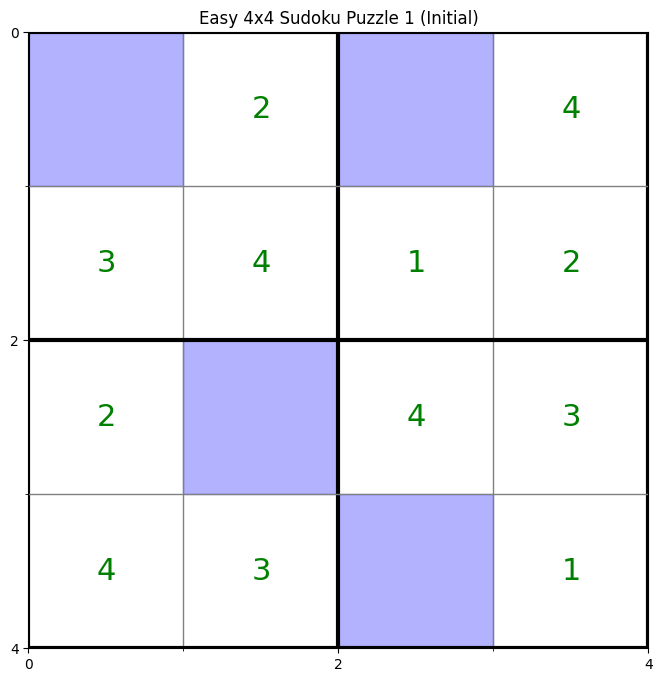

Easy 4x4 Sudoku Puzzle 2 (Initial):


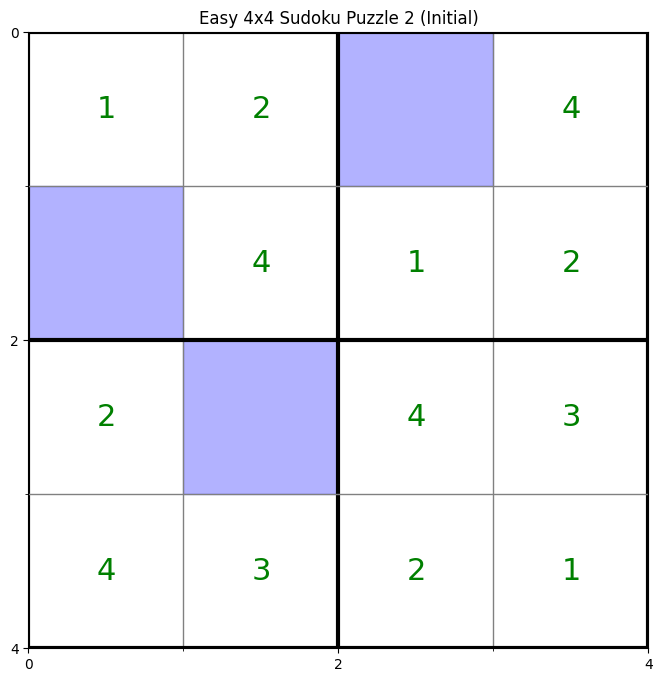

Easy 9x9 Sudoku Puzzle (Initial):


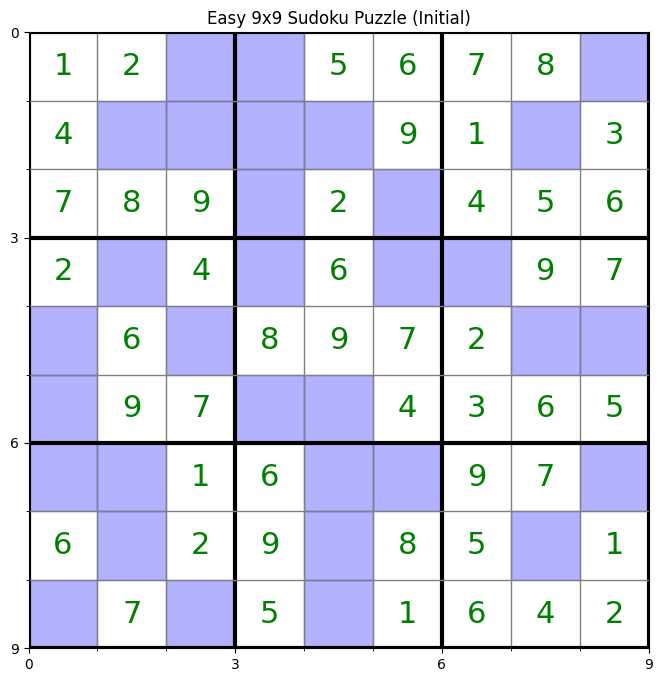

Solved 4x4 Sudoku Puzzle 1 (With Blue Filled Cells):


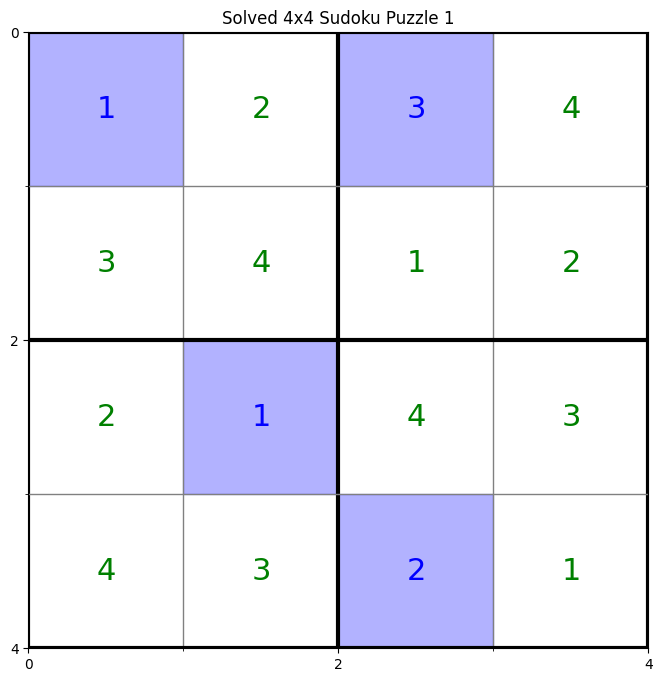

Solved 4x4 Sudoku Puzzle 2 (With Blue Filled Cells):


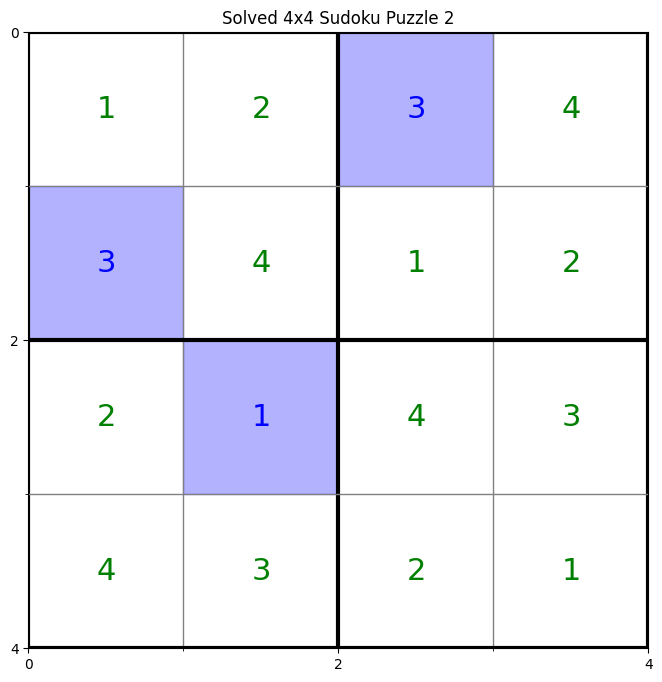

Solved 9x9 Sudoku Puzzle (With Blue Filled Cells):


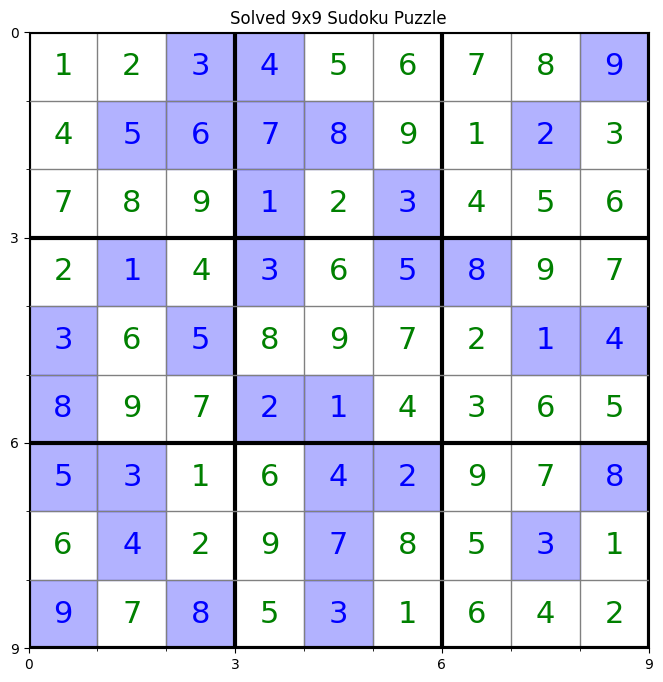

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to create an empty Sudoku grid of specified size
def empty_sudoku_grid(size):
    return np.zeros((size, size), dtype=int)

# Function to display the Sudoku grid with color-coded numbers and bold inner borders
def plot_sudoku(grid, initial_grid, title="Sudoku Grid"):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(0, grid.shape[0])
    ax.set_ylim(0, grid.shape[1])
    
    # Set grid and bold lines for 3x3 or 2x2 subgrids
    ax.set_xticks(np.arange(0, grid.shape[0], 1), minor=True)
    ax.set_yticks(np.arange(0, grid.shape[1], 1), minor=True)
    
    # Standard grid for minor ticks
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
    
    # Bold grid for sub-boxes (3x3 or 2x2)
    box_size = int(grid.shape[0] ** 0.5)
    ax.set_xticks(np.arange(0, grid.shape[0] + 1, box_size))
    ax.set_yticks(np.arange(0, grid.shape[1] + 1, box_size))
    ax.grid(which='major', color='black', linestyle='-', linewidth=3)  # Bold borders

    # Color the cells based on whether they were initially empty or filled
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            num = grid[y][x]
            # Blue background for empty cells (including those later filled)
            if initial_grid[y][x] == 0:
                ax.add_patch(plt.Rectangle((x, y), 1, 1, color='blue', alpha=0.3))
                if num != 0:  # Display filled numbers in blue
                    ax.text(x + 0.5, y + 0.5, str(num), fontsize=22, ha='center', va='center', color='blue')
            elif num != 0:  # Initially filled cells remain in green
                ax.text(x + 0.5, y + 0.5, str(num), fontsize=22, ha='center', va='center', color='green')

    ax.invert_yaxis()
    plt.title(title)
    plt.show()

# Sudoku Backtracking Solver
def is_valid(grid, row, col, num, box_size):
    if num in grid[row] or num in grid[:, col]:
        return False
    box_start_row, box_start_col = row // box_size * box_size, col // box_size * box_size
    if num in grid[box_start_row:box_start_row+box_size, box_start_col:box_start_col+box_size]:
        return False
    return True

def solve_sudoku(grid, box_size):
    size = grid.shape[0]
    for row in range(size):
        for col in range(size):
            if grid[row][col] == 0:
                for num in range(1, size + 1):
                    if is_valid(grid, row, col, num, box_size):
                        grid[row][col] = num
                        if solve_sudoku(grid, box_size):
                            return True
                        grid[row][col] = 0
                return False
    return True

# Generate Partially Filled Sudoku Grids
def generate_sudoku(grid, box_size, num_clues):
    solve_sudoku(grid, box_size)
    
    # Remove some cells to create a puzzle
    total_cells = grid.shape[0] ** 2
    cells_to_remove = total_cells - num_clues
    for _ in range(cells_to_remove):
        row, col = random.randint(0, grid.shape[0] - 1), random.randint(0, grid.shape[1] - 1)
        grid[row][col] = 0
    return grid

# Create and solve 4x4 Sudoku Grids
grid_4x4_1 = empty_sudoku_grid(4)
grid_4x4_2 = empty_sudoku_grid(4)

generate_sudoku(grid_4x4_1, box_size=2, num_clues=12)
generate_sudoku(grid_4x4_2, box_size=2, num_clues=12)

# Store the initial state before solving for later comparison
initial_grid_4x4_1 = grid_4x4_1.copy()
initial_grid_4x4_2 = grid_4x4_2.copy()

print("Easy 4x4 Sudoku Puzzle 1 (Initial):")
plot_sudoku(grid_4x4_1, initial_grid_4x4_1, "Easy 4x4 Sudoku Puzzle 1 (Initial)")

print("Easy 4x4 Sudoku Puzzle 2 (Initial):")
plot_sudoku(grid_4x4_2, initial_grid_4x4_2, "Easy 4x4 Sudoku Puzzle 2 (Initial)")

# Create and solve 9x9 Sudoku Grid
grid_9x9 = empty_sudoku_grid(9)
generate_sudoku(grid_9x9, box_size=3, num_clues=40)
initial_grid_9x9 = grid_9x9.copy()

print("Easy 9x9 Sudoku Puzzle (Initial):")
plot_sudoku(grid_9x9, initial_grid_9x9, "Easy 9x9 Sudoku Puzzle (Initial)")

# Solve and visualize the solved puzzles with blue filled cells for previously empty spots
solve_sudoku(grid_4x4_1, box_size=2)
solve_sudoku(grid_4x4_2, box_size=2)
solve_sudoku(grid_9x9, box_size=3)

print("Solved 4x4 Sudoku Puzzle 1 (With Blue Filled Cells):")
plot_sudoku(grid_4x4_1, initial_grid_4x4_1, "Solved 4x4 Sudoku Puzzle 1")

print("Solved 4x4 Sudoku Puzzle 2 (With Blue Filled Cells):")
plot_sudoku(grid_4x4_2, initial_grid_4x4_2, "Solved 4x4 Sudoku Puzzle 2")

print("Solved 9x9 Sudoku Puzzle (With Blue Filled Cells):")
plot_sudoku(grid_9x9, initial_grid_9x9, "Solved 9x9 Sudoku Puzzle")


Medium 9x9 Sudoku Puzzle 1 (Initial):


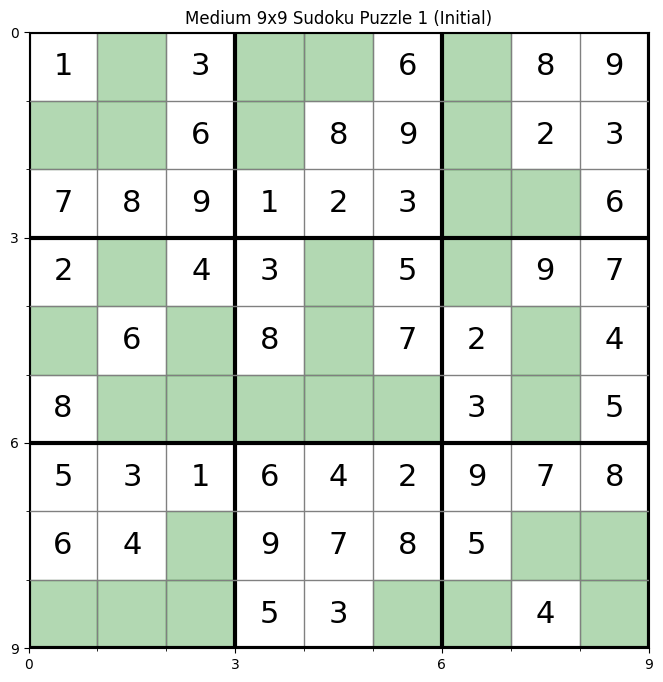

Medium 9x9 Sudoku Puzzle 2 (Initial):


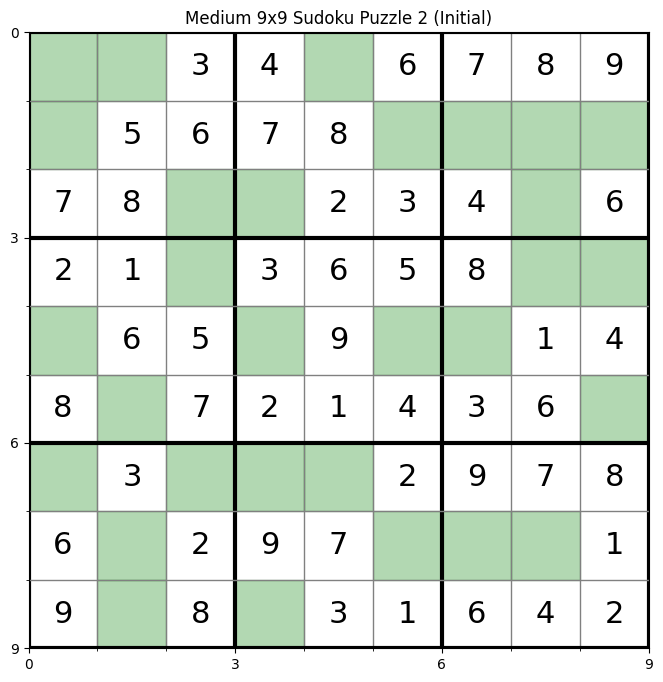

Solved Medium 9x9 Sudoku Puzzle 1:


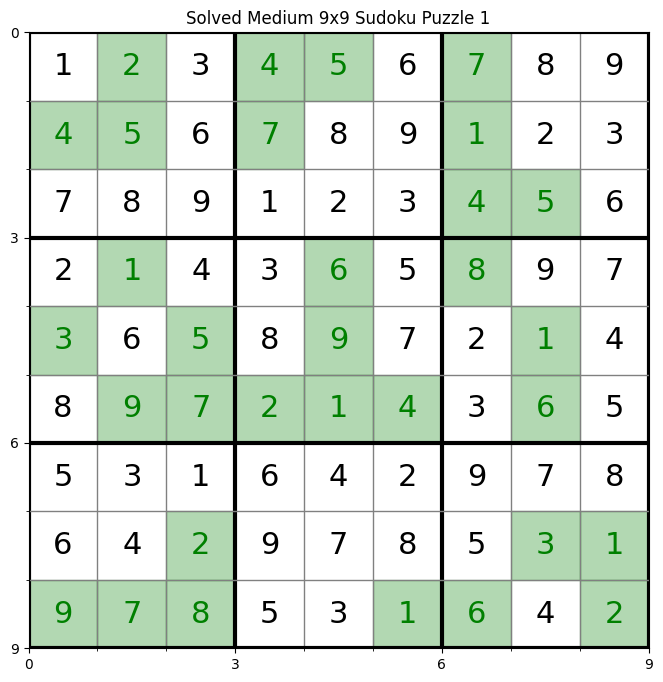

Solved Medium 9x9 Sudoku Puzzle 2:


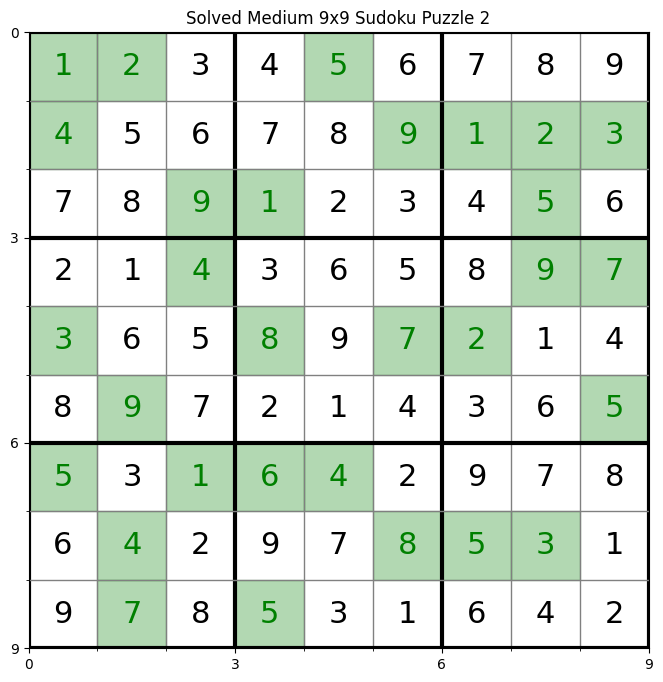

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to create an empty Sudoku grid of specified size
def empty_sudoku_grid(size):
    return np.zeros((size, size), dtype=int)

# Function to display the Sudoku grid with color-coded numbers and bold inner borders
def plot_sudoku(grid, initial_grid, title="Sudoku Grid"):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(0, grid.shape[0])
    ax.set_ylim(0, grid.shape[1])
    
    # Set grid and bold lines for 3x3 subgrids
    ax.set_xticks(np.arange(0, grid.shape[0], 1), minor=True)
    ax.set_yticks(np.arange(0, grid.shape[1], 1), minor=True)
    
    # Standard grid for minor ticks
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
    
    # Bold grid for sub-boxes (3x3)
    box_size = int(grid.shape[0] ** 0.5)
    ax.set_xticks(np.arange(0, grid.shape[0] + 1, box_size))
    ax.set_yticks(np.arange(0, grid.shape[1] + 1, box_size))
    ax.grid(which='major', color='black', linestyle='-', linewidth=3)  # Bold borders

    # Color the cells based on whether they were initially empty or filled
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            num = grid[y][x]
            # Green background for empty cells (including those later filled)
            if initial_grid[y][x] == 0:
                ax.add_patch(plt.Rectangle((x, y), 1, 1, color='green', alpha=0.3))
                if num != 0:  # Display filled numbers in green
                    ax.text(x + 0.5, y + 0.5, str(num), fontsize=22, ha='center', va='center', color='green')
            elif num != 0:  # Initially filled cells remain in black
                ax.text(x + 0.5, y + 0.5, str(num), fontsize=22, ha='center', va='center', color='black')

    ax.invert_yaxis()
    plt.title(title)
    plt.show()

# Sudoku Backtracking Solver
def is_valid(grid, row, col, num, box_size):
    if num in grid[row] or num in grid[:, col]:
        return False
    box_start_row, box_start_col = row // box_size * box_size, col // box_size * box_size
    if num in grid[box_start_row:box_start_row+box_size, box_start_col:box_start_col+box_size]:
        return False
    return True

def solve_sudoku(grid, box_size):
    size = grid.shape[0]
    for row in range(size):
        for col in range(size):
            if grid[row][col] == 0:
                for num in range(1, size + 1):
                    if is_valid(grid, row, col, num, box_size):
                        grid[row][col] = num
                        if solve_sudoku(grid, box_size):
                            return True
                        grid[row][col] = 0
                return False
    return True

# Generate Partially Filled Sudoku Grids
def generate_sudoku(grid, box_size, num_clues):
    solve_sudoku(grid, box_size)
    
    # Remove some cells to create a puzzle
    total_cells = grid.shape[0] ** 2
    cells_to_remove = total_cells - num_clues
    for _ in range(cells_to_remove):
        row, col = random.randint(0, grid.shape[0] - 1), random.randint(0, grid.shape[1] - 1)
        grid[row][col] = 0
    return grid

# Create and solve 9x9 Sudoku Grids with medium difficulty (40 clues)
grid_9x9_1 = empty_sudoku_grid(9)
grid_9x9_2 = empty_sudoku_grid(9)

generate_sudoku(grid_9x9_1, box_size=3, num_clues=40)
generate_sudoku(grid_9x9_2, box_size=3, num_clues=40)

# Store the initial state before solving for later comparison
initial_grid_9x9_1 = grid_9x9_1.copy()
initial_grid_9x9_2 = grid_9x9_2.copy()

# Display the initial puzzles
print("Medium 9x9 Sudoku Puzzle 1 (Initial):")
plot_sudoku(grid_9x9_1, initial_grid_9x9_1, "Medium 9x9 Sudoku Puzzle 1 (Initial)")

print("Medium 9x9 Sudoku Puzzle 2 (Initial):")
plot_sudoku(grid_9x9_2, initial_grid_9x9_2, "Medium 9x9 Sudoku Puzzle 2 (Initial)")

# Solve and visualize the solved puzzles
solve_sudoku(grid_9x9_1, box_size=3)
solve_sudoku(grid_9x9_2, box_size=3)

# Display the solved Sudoku grids with previously empty cells in green
print("Solved Medium 9x9 Sudoku Puzzle 1:")
plot_sudoku(grid_9x9_1, initial_grid_9x9_1, "Solved Medium 9x9 Sudoku Puzzle 1")

print("Solved Medium 9x9 Sudoku Puzzle 2:")
plot_sudoku(grid_9x9_2, initial_grid_9x9_2, "Solved Medium 9x9 Sudoku Puzzle 2")


Hardest 9x9 Sudoku Puzzle (Initial):


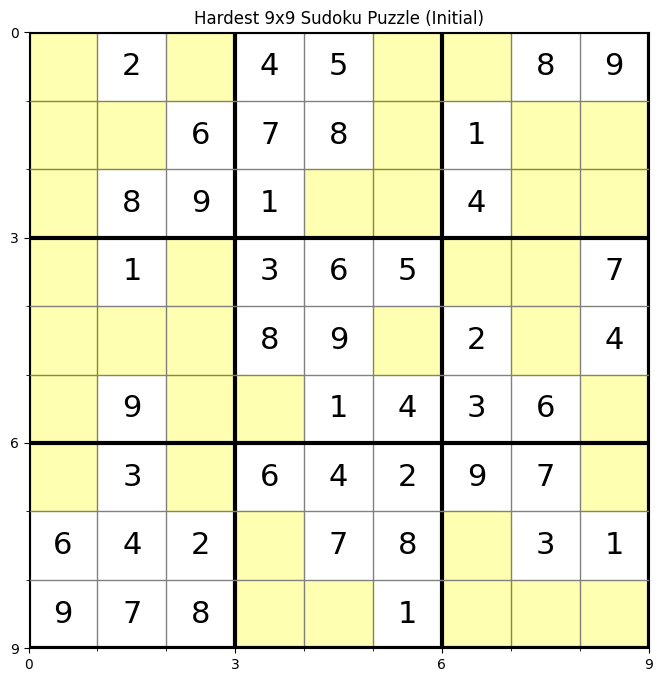

Hardest 16x16 Sudoku Puzzle 1 (Initial):


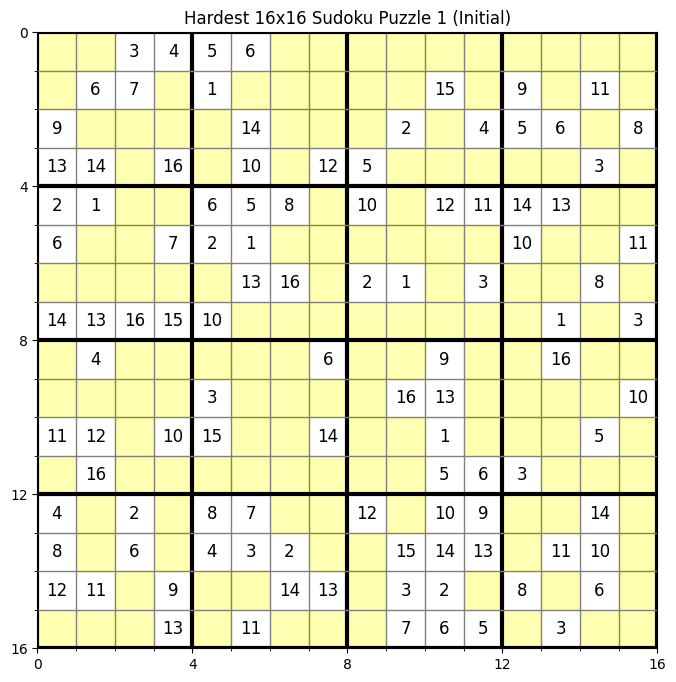

Hardest 16x16 Sudoku Puzzle 2 (Initial):


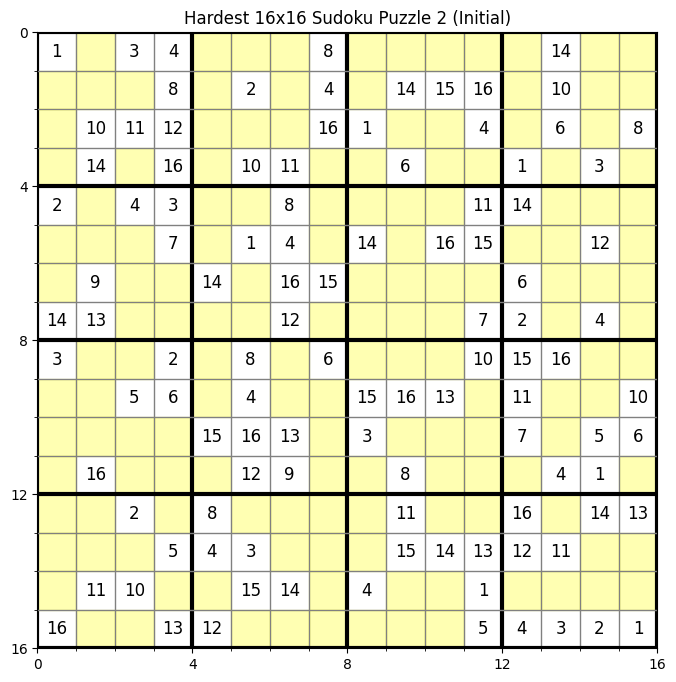

Solved Hardest 9x9 Sudoku Puzzle:


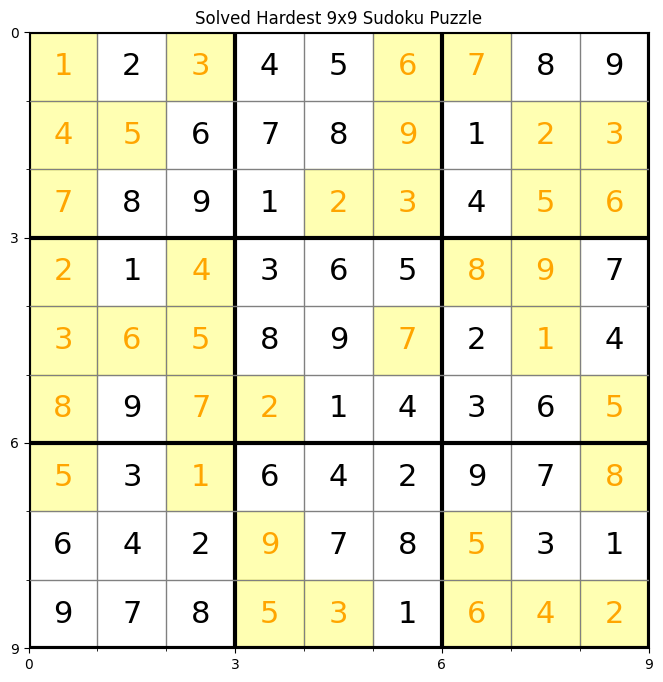

Solved Hardest 16x16 Sudoku Puzzle 1:


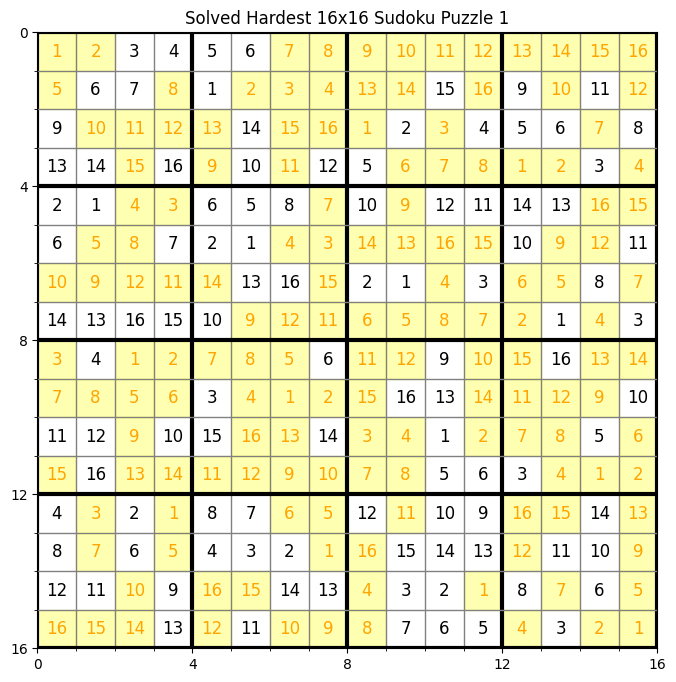

Solved Hardest 16x16 Sudoku Puzzle 2:


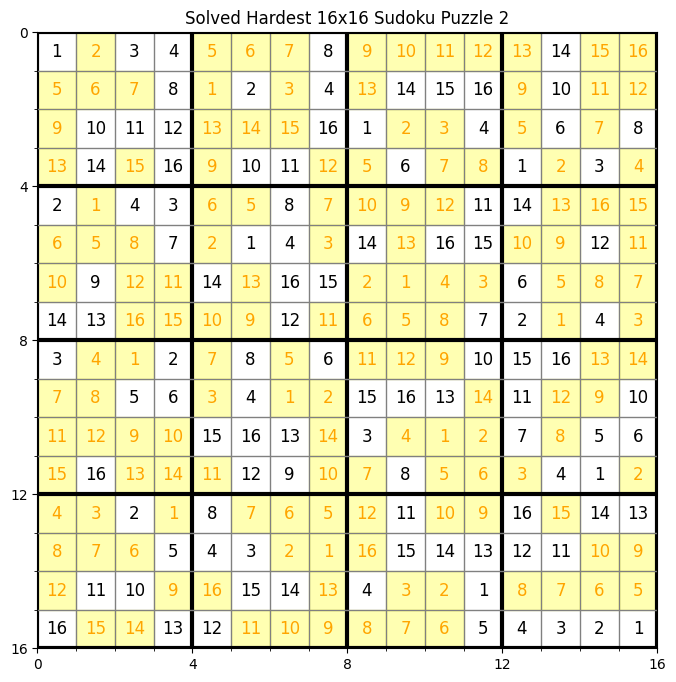

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to create an empty Sudoku grid of specified size
def empty_sudoku_grid(size):
    return np.zeros((size, size), dtype=int)

# Function to display the Sudoku grid with color-coded numbers and bold inner borders
def plot_sudoku(grid, initial_grid, title="Sudoku Grid"):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(0, grid.shape[0])
    ax.set_ylim(0, grid.shape[1])
    
    # Set grid and bold lines for subgrids (3x3 for 9x9, 4x4 for 16x16)
    ax.set_xticks(np.arange(0, grid.shape[0], 1), minor=True)
    ax.set_yticks(np.arange(0, grid.shape[1], 1), minor=True)
    
    # Standard grid for minor ticks
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
    
    # Bold grid for sub-boxes (3x3 for 9x9 or 4x4 for 16x16)
    box_size = int(grid.shape[0] ** 0.5)
    ax.set_xticks(np.arange(0, grid.shape[0] + 1, box_size))
    ax.set_yticks(np.arange(0, grid.shape[1] + 1, box_size))
    ax.grid(which='major', color='black', linestyle='-', linewidth=3)  # Bold borders

    # Color the cells based on whether they were initially empty or filled
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            num = grid[y][x]
            # Yellow background for empty cells (including those later filled)
            if initial_grid[y][x] == 0:
                ax.add_patch(plt.Rectangle((x, y), 1, 1, color='yellow', alpha=0.3))
                if num != 0:  # Display filled numbers in yellow
                    ax.text(x + 0.5, y + 0.5, str(num), fontsize=12 if grid.shape[0] == 16 else 22, 
                            ha='center', va='center', color='orange')
            elif num != 0:  # Initially filled cells remain in black
                ax.text(x + 0.5, y + 0.5, str(num), fontsize=12 if grid.shape[0] == 16 else 22, 
                        ha='center', va='center', color='black')

    ax.invert_yaxis()
    plt.title(title)
    plt.show()

# Sudoku Backtracking Solver
def is_valid(grid, row, col, num, box_size):
    if num in grid[row] or num in grid[:, col]:
        return False
    box_start_row, box_start_col = row // box_size * box_size, col // box_size * box_size
    if num in grid[box_start_row:box_start_row+box_size, box_start_col:box_start_col+box_size]:
        return False
    return True

def solve_sudoku(grid, box_size):
    size = grid.shape[0]
    for row in range(size):
        for col in range(size):
            if grid[row][col] == 0:
                for num in range(1, size + 1):
                    if is_valid(grid, row, col, num, box_size):
                        grid[row][col] = num
                        if solve_sudoku(grid, box_size):
                            return True
                        grid[row][col] = 0
                return False
    return True

# Generate Partially Filled Sudoku Grids
def generate_sudoku(grid, box_size, num_clues):
    solve_sudoku(grid, box_size)
    
    # Remove cells to create the hardest Sudoku puzzle
    total_cells = grid.shape[0] ** 2
    cells_to_remove = total_cells - num_clues
    for _ in range(cells_to_remove):
        row, col = random.randint(0, grid.shape[0] - 1), random.randint(0, grid.shape[1] - 1)
        grid[row][col] = 0
    return grid

# Create Sudoku Grids with hardest difficulty (minimal clues)
# 9x9 Sudoku - Hardest (22 clues)
grid_9x9 = empty_sudoku_grid(9)
generate_sudoku(grid_9x9, box_size=3, num_clues=22)
initial_grid_9x9 = grid_9x9.copy()

# 16x16 Sudoku Grids - Hardest (40 clues each)
grid_16x16_1 = empty_sudoku_grid(16)
grid_16x16_2 = empty_sudoku_grid(16)
generate_sudoku(grid_16x16_1, box_size=4, num_clues=40)
generate_sudoku(grid_16x16_2, box_size=4, num_clues=40)
initial_grid_16x16_1 = grid_16x16_1.copy()
initial_grid_16x16_2 = grid_16x16_2.copy()

# Display the initial puzzles
print("Hardest 9x9 Sudoku Puzzle (Initial):")
plot_sudoku(grid_9x9, initial_grid_9x9, "Hardest 9x9 Sudoku Puzzle (Initial)")

print("Hardest 16x16 Sudoku Puzzle 1 (Initial):")
plot_sudoku(grid_16x16_1, initial_grid_16x16_1, "Hardest 16x16 Sudoku Puzzle 1 (Initial)")

print("Hardest 16x16 Sudoku Puzzle 2 (Initial):")
plot_sudoku(grid_16x16_2, initial_grid_16x16_2, "Hardest 16x16 Sudoku Puzzle 2 (Initial)")

# Solve and visualize the solved puzzles
solve_sudoku(grid_9x9, box_size=3)
solve_sudoku(grid_16x16_1, box_size=4)
solve_sudoku(grid_16x16_2, box_size=4)

# Display the solved Sudoku grids
print("Solved Hardest 9x9 Sudoku Puzzle:")
plot_sudoku(grid_9x9, initial_grid_9x9, "Solved Hardest 9x9 Sudoku Puzzle")

print("Solved Hardest 16x16 Sudoku Puzzle 1:")
plot_sudoku(grid_16x16_1, initial_grid_16x16_1, "Solved Hardest 16x16 Sudoku Puzzle 1")

print("Solved Hardest 16x16 Sudoku Puzzle 2:")
plot_sudoku(grid_16x16_2, initial_grid_16x16_2, "Solved Hardest 16x16 Sudoku Puzzle 2")
